In [1]:
pip install kaggle 

Note: you may need to restart the kernel to use updated packages.


In [2]:


import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from datetime import datetime
import plotly.express as px 
import folium
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
!pip install ydata-profiling
# Option 1: Use ydata-profiling instead (newer version of pandas-profiling)
from ydata_profiling import ProfileReport  # recommended replacement



In [3]:


# Set display options to show everything
# pd.set_option('display.max_rows', None)       # Show all rows
# pd.set_option('display.max_columns', None)    # Show all columns
# pd.set_option('display.width', None)          # Prevent line wrapping
# pd.set_option('display.max_colwidth', None)   # Show full content in each cell



In [4]:
df = pd.read_csv("/Users/adrianamenjivar/Downloads/fatal-police-shootings-data.csv")

df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False


In [92]:
#spread of the data 
print(f'age total: {df.age.count()}')
print(f'age min: {df.age.min()}')
print(f'age max: {df.age.max()}') #highest value
print(f'these values are below 25%: {df.age.quantile(.25)}') # value 25% of the records are below it 
print(f' median: {df.age.quantile(.50)}') # alue of 50% similar to median.. 50 % will be lower than that
print(df.age.quantile(.75)) # 75% of the data is below that amount 
print(df.age.mean())
print(df.age.median())
print(df.age.mode()) #count of the unique values of the list

age total: 5181
age min: 6.0
age max: 91.0
these values are below 25%: 27.0
 median: 35.0
46.0
37.11793090137039
35.0
0    31.0
Name: age, dtype: float64


In [97]:
df.age.std() # numbers are diff bc pandas asumes numbers by defult - we usually use this one 

13.11613513252016

In [98]:
np.std(df.age) #numpy assumes by population

13.114869279587374

In [102]:
#measurre adnormality of data set
#shows issues of skewness 
from scipy.stats import kurtosis, skew

print(skew(df.age, bias=False))     
print(kurtosis(df.age, bias=False))

nan
nan


In [104]:
print(df.age.skew()) 
#negative score skew left

0.7067593005631907


In [105]:
print(df.age.kurt())
#negative score skew left


0.10355528118709278


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5416 entries, 0 to 5415
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5416 non-null   int64  
 1   name                     5416 non-null   object 
 2   date                     5416 non-null   object 
 3   manner_of_death          5416 non-null   object 
 4   armed                    5189 non-null   object 
 5   age                      5181 non-null   float64
 6   gender                   5414 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     5416 non-null   object 
 9   state                    5416 non-null   object 
 10  signs_of_mental_illness  5416 non-null   bool   
 11  threat_level             5416 non-null   object 
 12  flee                     5167 non-null   object 
 13  body_camera              5416 non-null   bool   
dtypes: bool(2), float64(1), 

#  Cleaning Checklist:
- Load the dataset

- Understand the structure (.info(), .head())

- Convert any date/time fields
- Check for missing values

- Handle missing or invalid values

- Standardize text fields (e.g., .str.strip(), .str.upper())
- Rename columns if needed

- Remove duplicates

- Check for outliers (optional)

In [6]:
# turning date into proper format 
df["date"] = pd.to_datetime(df["date"], errors='coerce')

#re name the column - then use pc.to_datetime = (tell it what collumn, if errors = coerce)


In [7]:
#now with it converted we can use 
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['weekday'] = df['date'].dt.day_name()

# THIS created new columns fro date
# focus on the parts after the = sign so grab ur column then do dt.year etc

In [8]:
df.isnull().sum()
#seeing how many nulls each column has

id                           0
name                         0
date                         0
manner_of_death              0
armed                      227
age                        235
gender                       2
race                       521
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       249
body_camera                  0
year                         0
month                        0
weekday                      0
dtype: int64

In [9]:
# checking what % of the column is empty 

for col in df.columns:
    missing_percent = (df[col].isnull().sum() / len(df)) * 100
    #divide nulls by total then divide by 100
    
    if missing_percent == 0:
        print(f"{col}: ✅ No missing values")
    elif missing_percent < 30:
        print(f"{col}: ⚠️ Has some missing values ({missing_percent:.2f}%)")
    else:
        print(f"{col}: ❌ Too many missing values ({missing_percent:.2f}%)")

# so bc theres only 30% or less of missing values we keep those columns


id: ✅ No missing values
name: ✅ No missing values
date: ✅ No missing values
manner_of_death: ✅ No missing values
armed: ⚠️ Has some missing values (4.19%)
age: ⚠️ Has some missing values (4.34%)
gender: ⚠️ Has some missing values (0.04%)
race: ⚠️ Has some missing values (9.62%)
city: ✅ No missing values
state: ✅ No missing values
signs_of_mental_illness: ✅ No missing values
threat_level: ✅ No missing values
flee: ⚠️ Has some missing values (4.60%)
body_camera: ✅ No missing values
year: ✅ No missing values
month: ✅ No missing values
weekday: ✅ No missing values


In [10]:
# For text-based columns
#filling/cleaning nulls

text_cols = ['armed', 'gender', 'race', 'flee']
for col in text_cols:
    df[col] = df[col].fillna('Unknown').astype(str).str.strip().str.title()
# # Step 3:stip -  Remove any extra spaces at the beginning or end (e.g., "  Male " → "Male")             
# Step 4: title - Capitalize the first letter of each word (e.g., "unknown" → "Unknown")
    

# For numeric column
df['age'] = df['age'].fillna(-1)



In [11]:
df.isnull().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
year                       0
month                      0
weekday                    0
dtype: int64

In [12]:
# fix the values inside to all look the same


text_cols = df.select_dtypes(include='object').columns.tolist() #saying fot every object in df

for col in text_cols:
    df[col] = df[col].astype(str).str.strip().str.upper()

#strip takes out spaces and upper capatilizes everything


In [13]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year,month,weekday
0,3,TIM ELLIOT,2015-01-02,SHOT,GUN,53.0,M,A,SHELTON,WA,True,ATTACK,NOT FLEEING,False,2015,1,FRIDAY
1,4,LEWIS LEE LEMBKE,2015-01-02,SHOT,GUN,47.0,M,W,ALOHA,OR,False,ATTACK,NOT FLEEING,False,2015,1,FRIDAY
2,5,JOHN PAUL QUINTERO,2015-01-03,SHOT AND TASERED,UNARMED,23.0,M,H,WICHITA,KS,False,OTHER,NOT FLEEING,False,2015,1,SATURDAY
3,8,MATTHEW HOFFMAN,2015-01-04,SHOT,TOY WEAPON,32.0,M,W,SAN FRANCISCO,CA,True,ATTACK,NOT FLEEING,False,2015,1,SUNDAY
4,9,MICHAEL RODRIGUEZ,2015-01-04,SHOT,NAIL GUN,39.0,M,H,EVANS,CO,False,ATTACK,NOT FLEEING,False,2015,1,SUNDAY


In [14]:
# lets see if we have any duplicates 
df[df.duplicated()]

# if we did have obvious ones .. df = df.drop_duplicates()


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year,month,weekday


In [15]:
# lets check for outliers 

df.describe()

#Standard Deviation = how spread out the ages are from the mean.
# age: std = 14.9 means most ages are within 14 years of the average above and beolow

,id,date,age,year,month
count,5416.000000,5416,5416.000000,5416.000000,5416.000000
mean,3010.398264,2017-09-28 07:28:00.354505216,35.463996,2017.274742,6.144018
min,3.000000,2015-01-02 00:00:00,-1.000000,2015.000000,1.000000
25%,1545.750000,2016-05-13 18:00:00,26.000000,2016.000000,3.000000
50%,3009.500000,2017-10-04 12:00:00,34.000000,2017.000000,6.000000
75%,4486.250000,2019-02-12 06:00:00,45.000000,2019.000000,9.000000
max,5927.000000,2020-06-16 00:00:00,91.000000,2020.000000,12.000000
std,1695.786456,NaN,14.996244,1.599699,3.473090


In [16]:
print("Min age:", df['age'].min())
print("Max age:", df['age'].max())

# Look at any rows with super young or super old values
df[df['age'] > 100]  # unusually old
df[df['age'] < 0]    # invalid
#min age is unknown

Min age: -1.0
Max age: 91.0


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year,month,weekday
127,584,ALEJANDRO SALAZAR,2015-02-20,SHOT,GUN,-1.0,M,H,HOUSTON,TX,False,ATTACK,CAR,False,2015,2,FRIDAY
658,789,ROGER ALBRECHT,2015-08-29,SHOT,KNIFE,-1.0,M,W,SAN ANTONIO,TX,False,OTHER,NOT FLEEING,False,2015,8,SATURDAY
707,839,LAWRENCE PRICE,2015-09-17,SHOT,GUN,-1.0,M,W,BRODHEAD,KY,False,ATTACK,NOT FLEEING,False,2015,9,THURSDAY
769,908,JASON DAY,2015-10-12,SHOT,GUN,-1.0,M,B,LAWTON,OK,False,ATTACK,NOT FLEEING,False,2015,10,MONDAY
809,1283,JOHN TOZZI,2015-10-24,SHOT,GUN,-1.0,M,UNKNOWN,NEW PALTZ,NY,False,ATTACK,NOT FLEEING,False,2015,10,SATURDAY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5373,5880,TK TK,2020-05-28,SHOT,CROWBAR,-1.0,M,UNKNOWN,FONTANA,CA,False,ATTACK,NOT FLEEING,False,2020,5,THURSDAY
5375,5851,TK TK,2020-05-28,SHOT AND TASERED,KNIFE,-1.0,M,UNKNOWN,WASHINGTON COUNTY,OR,False,OTHER,NOT FLEEING,True,2020,5,THURSDAY
5377,5845,TK TK,2020-05-29,SHOT,TOY WEAPON,-1.0,M,W,LANCASTER,CA,False,ATTACK,UNKNOWN,False,2020,5,FRIDAY
5379,5849,TK TK,2020-05-29,SHOT,KNIFE,-1.0,M,UNKNOWN,PHILADELPHIA,PA,False,OTHER,NOT FLEEING,False,2020,5,FRIDAY


In [17]:
df['age'] = df['age'].replace(-1, np.nan)
#saying where u see -1, put NaN instead bc -1 might confuse people

In [18]:
df["age"].describe()

count    5181.000000
mean       37.117931
std        13.116135
min         6.000000
25%        27.000000
50%        35.000000
75%        46.000000
max        91.000000
Name: age, dtype: float64

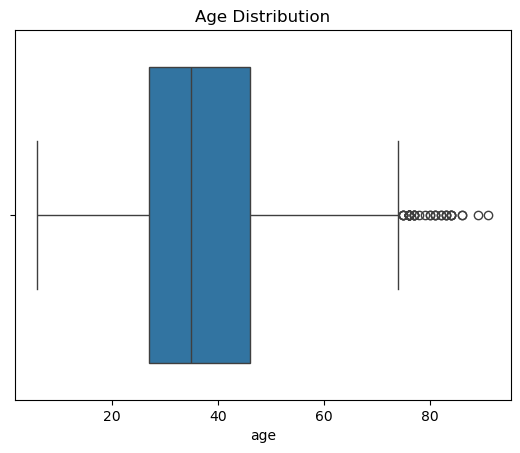

In [19]:
# lets see outliers plotted 

sns.boxplot(x=df['age'])
plt.title('Age Distribution')
plt.show()


# blue box = Middle 50% of the data falls withing there 
# line = median age 
# circle are the outliers 
#There's a bunch of outliers past age 70–80+

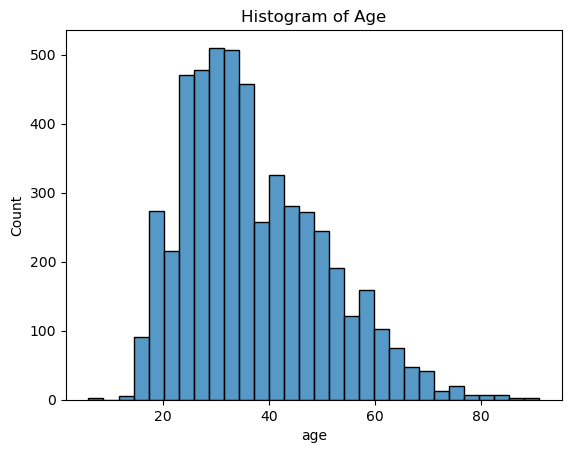

In [20]:
sns.histplot(df['age'], bins=30)
plt.title('Histogram of Age')
plt.show()
#shows it in a different way

In [21]:
df.select_dtypes(include=['float64', 'int64']).columns


Index(['id', 'age'], dtype='object')

EDA Done

# Ask and Answer Real-World Questions

Category	Sample Questions
- Demographics:	What is the most impacted race or gender?
- Mental Health: How common are mental illness indicators?
- Weapons:	Were most people armed or unarmed?
- Threat/Force:	Does threat level affect body camera use?
- Flight:	Are fleeing individuals more likely to be shot unarmed?

# Question 1: How many shootings occurred each year?

year
2015     994
2016     962
2017     986
2018     991
2019    1002
2020     481
Name: count, dtype: int64


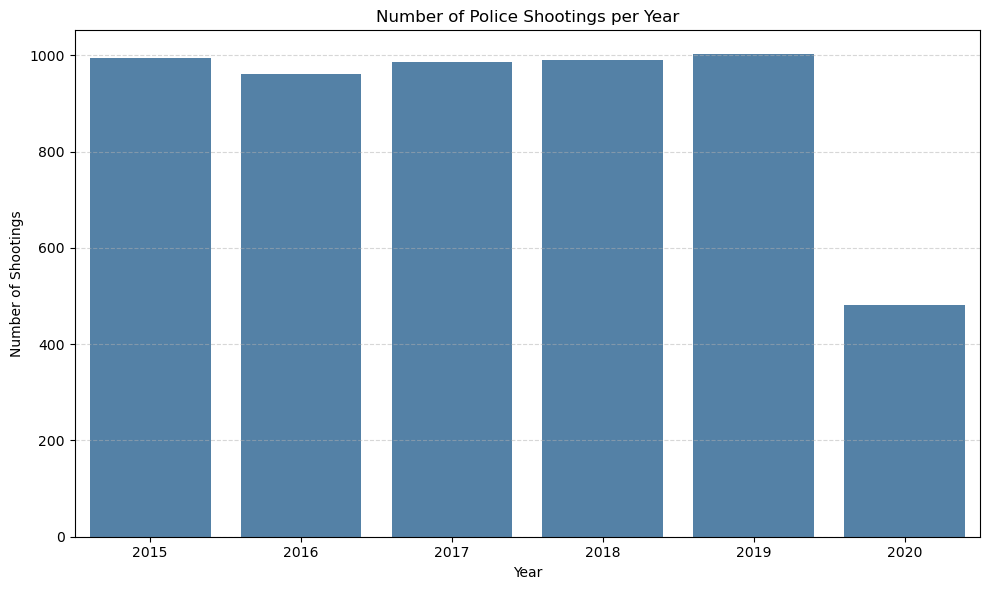

In [22]:

yearly_counts = df['year'].value_counts().sort_index()

#  Display the counts
print(yearly_counts)

# Plot the yearly trend
plt.figure(figsize=(10, 6))
sns.barplot(x=yearly_counts.index, y=yearly_counts.values, color='steelblue')

plt.title('Number of Police Shootings per Year')
plt.xlabel('Year')
plt.ylabel('Number of Shootings')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [23]:
yearly_counts = df['year'].value_counts()
yearly_counts


year
2019    1002
2015     994
2018     991
2017     986
2016     962
2020     481
Name: count, dtype: int64

BLUF: 2019 had the highest number of police shootings, with 1,002 incidents, followed by 2015 (994).
2016 showed a slight drop (962), but the numbers increased again in 2017 and 2018 before peaking in 2019.
2020 had a sharp drop to 481, likely influenced by the COVID-19 pandemic and changes in police activity.

# Demographics: What is the most impacted race or gender?

In [24]:
# Total by gender
df['gender'].value_counts()




gender
M          5176
F           238
UNKNOWN       2
Name: count, dtype: int64

In [25]:
(df['gender'].value_counts(normalize=True) * 100).round(2)

#give me the percentage 

gender
M          95.57
F           4.39
UNKNOWN     0.04
Name: proportion, dtype: float64

In [26]:
# Total by race
df['race'].value_counts()

race
W          2476
B          1298
H           902
UNKNOWN     521
A            93
N            78
O            48
Name: count, dtype: int64

In [27]:
(df['race'].value_counts(normalize=True) * 100).round(2)

race
W          45.72
B          23.97
H          16.65
UNKNOWN     9.62
A           1.72
N           1.44
O           0.89
Name: proportion, dtype: float64

# Code	Meaning	Count
- W	White	2,476
- B	Black or African American	1,298
- H	Hispanic or Latino	902
- UNKNOWN	Race not reported/recorded	521
- A	Asian	93
- N	Native American/Alaska Native	78
- O Other (e.g. multiracial/unspecified) 48

In [28]:
df.groupby(["race", "gender"]).size().unstack(fill_value=0)

#If some (year, race) combos didn't happen, it'll show up as NaN. fill_value=0 replaces those NaNs with 0s, to keep the math clean.




gender,F,M,UNKNOWN
race,,,
A,4,89,0
B,47,1251,0
H,26,876,0
N,5,73,0
O,4,44,0
UNKNOWN,16,504,1
W,136,2339,1


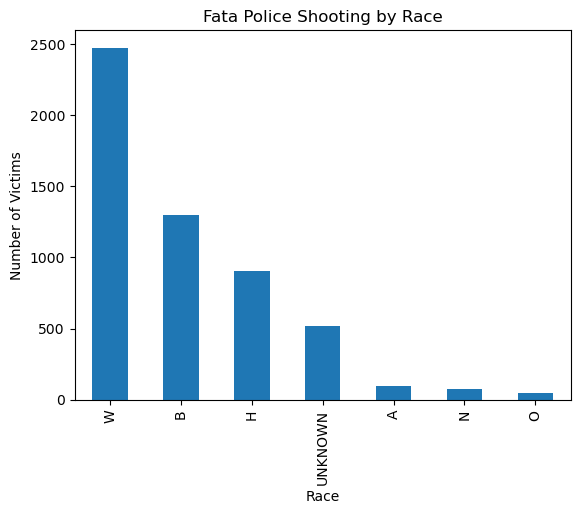

In [29]:
df["race"].value_counts().plot(kind='bar', title = 'Fata Police Shooting by Race')

plt.xlabel('Race')
plt.ylabel('Number of Victims')
plt.show()


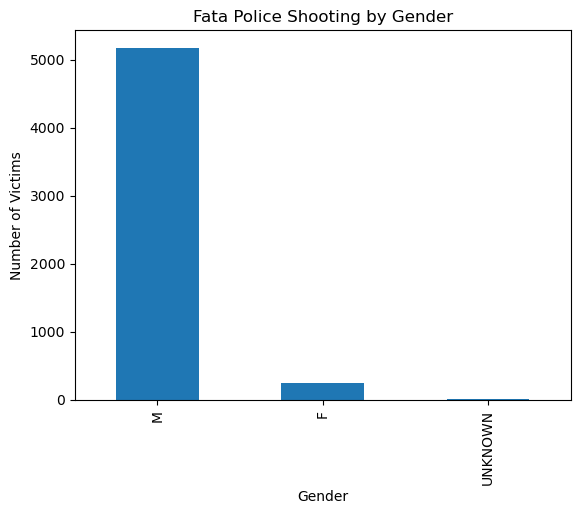

In [30]:
df["gender"].value_counts().plot(kind='bar', title = 'Fata Police Shooting by Gender')

plt.xlabel('Gender')
plt.ylabel('Number of Victims')
plt.show()


Bluf:
Based on the dataset, White individuals (W) were involved in the highest number of fatal police shootings overall, followed by Black (B) and Hispanic (H) individuals.

However, when comparing across gender, men (M) overwhelmingly account for the majority of victims.

A deeper breakdown shows that White males and Black males are the top two most impacted race-gender combinations in terms of raw numbers.

In [31]:
year_race = df.groupby(["year","race","gender"]).size().unstack(fill_value=0)
year_race

gender         F    M  UNKNOWN
year race                     
2015 A         0   14        0
     B        10  248        0
     H         3  169        0
     N         0    9        0
     O         2   13        0
     UNKNOWN   1   28        0
     W        26  471        0
2016 A         0   15        0
     B        11  223        0
     H         1  159        0
     N         5   11        0
     O         0   11        0
     UNKNOWN   2   56        0
     W        21  447        0
2017 A         1   15        0
     B         9  215        0
     H         5  174        0
     N         0   22        0
     O         0    6        0
     UNKNOWN   5   75        0
     W        25  433        1
2018 A         2   19        0
     B        10  219        0
     H         8  157        0
     N         0   15        0
     O         1    3        0
     UNKNOWN   4   99        0
     W        27  427        0
2019 A         1   18        0
     B         6  244        0
     H         7  156        0
     N         0   13        0
     O         0    9        0
     UNKNOWN   3  141        0
     W        26  378        0
2020 A         0    8        0
     B         1  102        0
     H         2   61        0
     N         0    3        0
     O         1    2        0
     UNKNOWN   1  105        1
     W        11  183        0

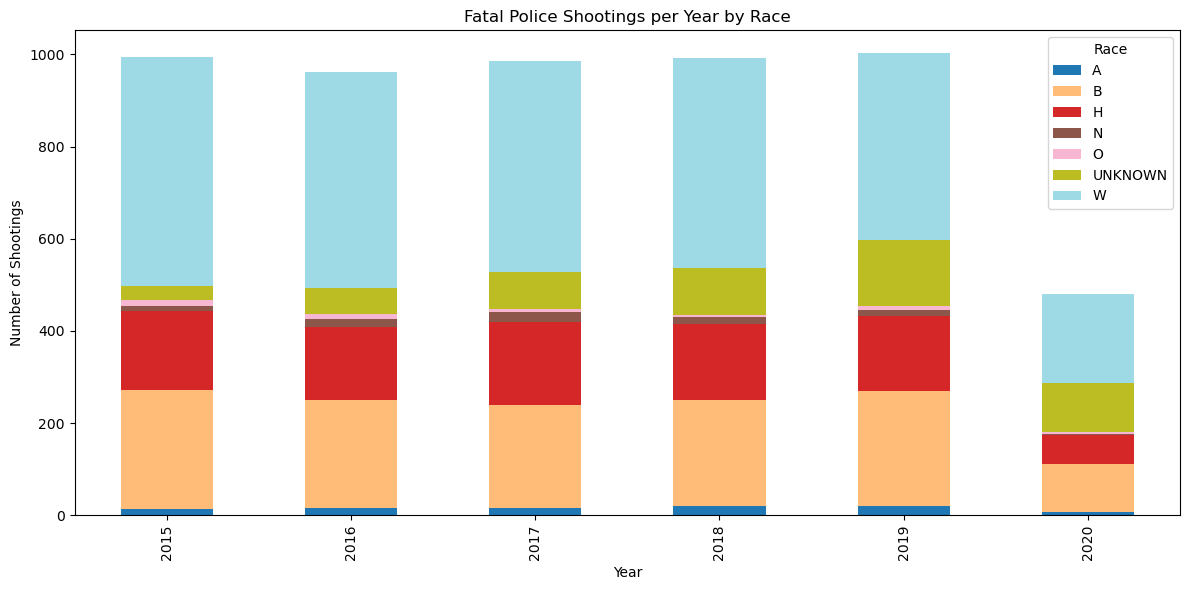

In [32]:
# Shootings per year by race
year_race = df.groupby(['year', 'race']).size().unstack(fill_value=0)

# Plot
year_race.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Fatal Police Shootings per Year by Race')
plt.xlabel('Year')
plt.ylabel('Number of Shootings')
plt.legend(title='Race')
plt.tight_layout()
plt.show()


# You read each segment's height to estimate how many people of that race were shot that year.
#so like H had arounf 250, B had around 150 etc

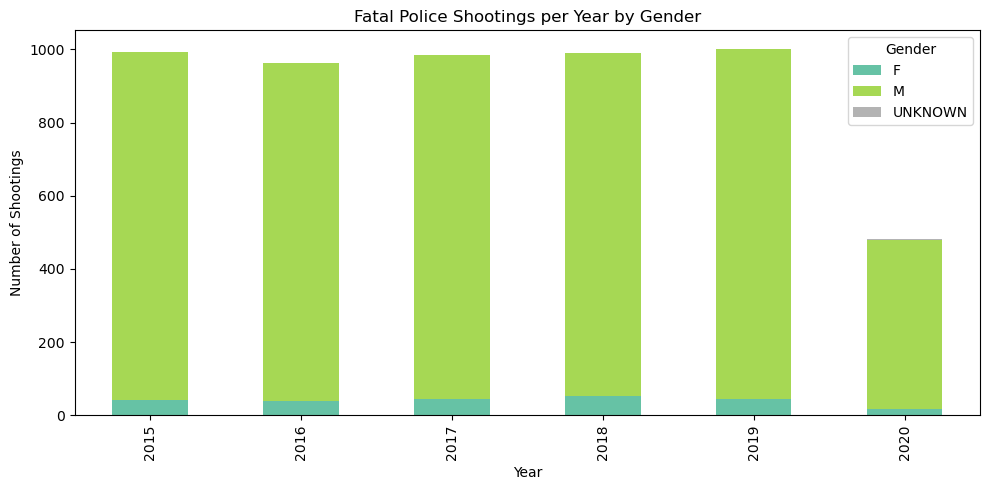

In [33]:
gender_year = df.groupby(['year', 'gender']).size().unstack(fill_value=0)

gender_year.plot(kind='bar', stacked=True, figsize=(10, 5), colormap='Set2')
plt.title('Fatal Police Shootings per Year by Gender')
plt.xlabel('Year')
plt.ylabel('Number of Shootings')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


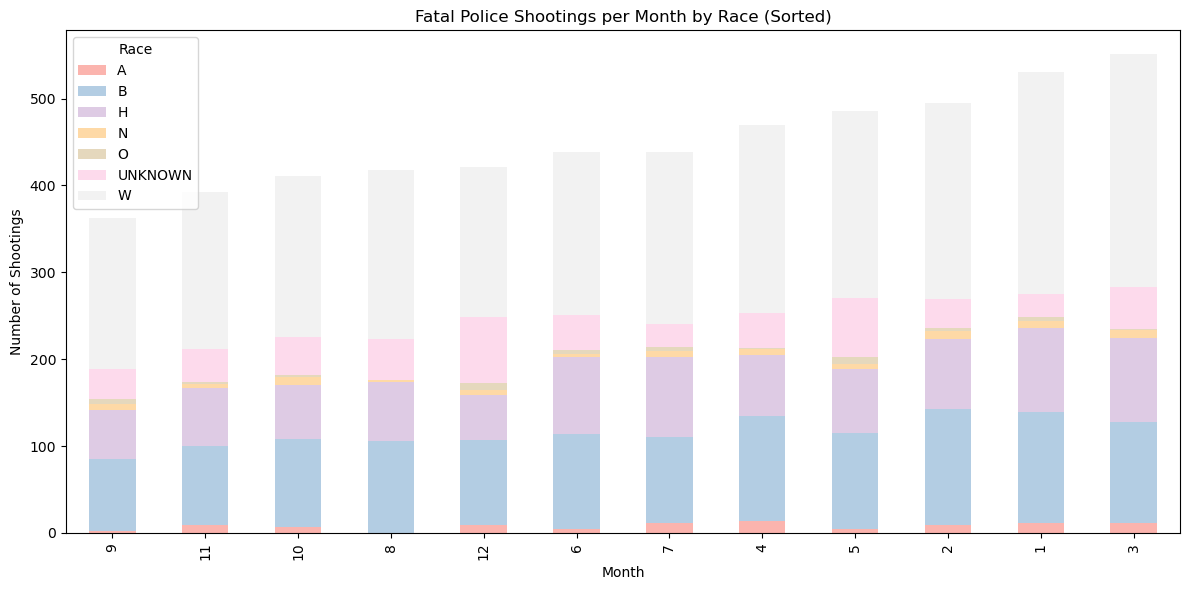

In [34]:
# Group by month and race
race_month = df.groupby(['month', 'race']).size().unstack(fill_value=0)

# Sort months by total shootings
race_month_sorted = race_month.sum(axis=1).sort_values().index

# race_month.sum(axis=1) adds up all race values per month (row-wise).sort_values() sorts the months by total shootings (from lowest to highest).
#.index gets the sorted list of months.


race_month = race_month.loc[race_month_sorted]
# Reorders the race_month table to follow the sorted month order, from least to most shootings


# Plot
race_month.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Pastel1')
plt.title('Fatal Police Shootings per Month by Race (Sorted)')
plt.xlabel('Month')
plt.ylabel('Number of Shootings')
plt.legend(title='Race')
plt.tight_layout()
plt.show()


# Gender by Year:

Nearly all victims were male

Minor variation across years

Big drop in 2020 (likely due to COVID lockdowns)

# Race by Month (Sorted):

March and January had the highest number of shootings

September and November were lower

White (W), Black (B), and Hispanic (H) appear most prominently across months

# How common are mental illness indicators?

In [35]:
df["signs_of_mental_illness"].value_counts()

signs_of_mental_illness
False    4200
True     1216
Name: count, dtype: int64

In [36]:
(df["signs_of_mental_illness"].value_counts(normalize=True).round(2))

#only 22% showed they had it

signs_of_mental_illness
False    0.78
True     0.22
Name: proportion, dtype: float64

/var/folders/47/7v7ccc2n5p55ztqrlzyy6j7c0000gn/T/ipykernel_41821/1056538987.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='signs_of_mental_illness', data=df, palette='Set2')


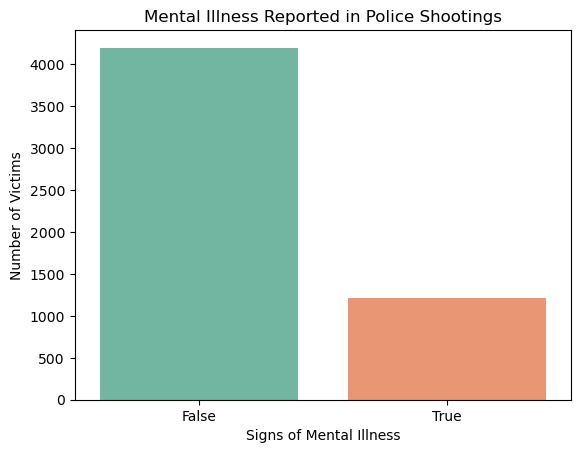

In [37]:
sns.countplot(x='signs_of_mental_illness', data=df, palette='Set2')
plt.title('Mental Illness Reported in Police Shootings')
plt.xlabel('Signs of Mental Illness')
plt.ylabel('Number of Victims')
plt.show()


About 77.5% of victims in fatal police shootings did not show signs of mental illness, according to the dataset.
Conversely, roughly 22.5% did — which is still a significant proportion, especially when mental health could be a factor in de-escalation.

# Are mentally ill individuals more likely to be unarmed or fleeing?

In [38]:
mental_pct = df['signs_of_mental_illness'].value_counts(normalize=True) * 100
print(mental_pct)
# calc percentage

signs_of_mental_illness
False    77.548006
True     22.451994
Name: proportion, dtype: float64


Are mentally ill individuals more likely to be unarmed or fleeing?

In [39]:
df["armed"].value_counts()

armed
GUN                        3060
KNIFE                       792
UNARMED                     353
UNKNOWN                     227
TOY WEAPON                  186
                           ... 
BASEBALL BAT AND BOTTLE       1
FIREWORKS                     1
PEN                           1
CHAINSAW                      1
CAR, KNIFE AND MACE           1
Name: count, Length: 94, dtype: int64

In [40]:
(df["armed"].value_counts(normalize=True).round(3))

armed
GUN                        0.565
KNIFE                      0.146
UNARMED                    0.065
UNKNOWN                    0.042
TOY WEAPON                 0.034
                           ...  
BASEBALL BAT AND BOTTLE    0.000
FIREWORKS                  0.000
PEN                        0.000
CHAINSAW                   0.000
CAR, KNIFE AND MACE        0.000
Name: proportion, Length: 94, dtype: float64

In [41]:
mental_armed = df.groupby(["armed","signs_of_mental_illness"]).size().unstack(fill_value=0)
mental_armed


#going to see how many were armed and reported a mental illness aswell. 

signs_of_mental_illness,False,True
armed,,
AIR CONDITIONER,1,0
AIR PISTOL,1,0
AIRSOFT PISTOL,1,0
AX,12,12
BARSTOOL,0,1
...,...,...
VEHICLE AND GUN,4,0
VEHICLE AND MACHETE,1,0
WALKING STICK,0,1


In [42]:
#top 10 most frequent weapons 
# Calculate total counts across both True/False columns
top_armed = mental_armed.sum(axis=1).sort_values(ascending=False).head(10)

# Subset just those top 10 rows
mental_armed_top = mental_armed.loc[top_armed.index]


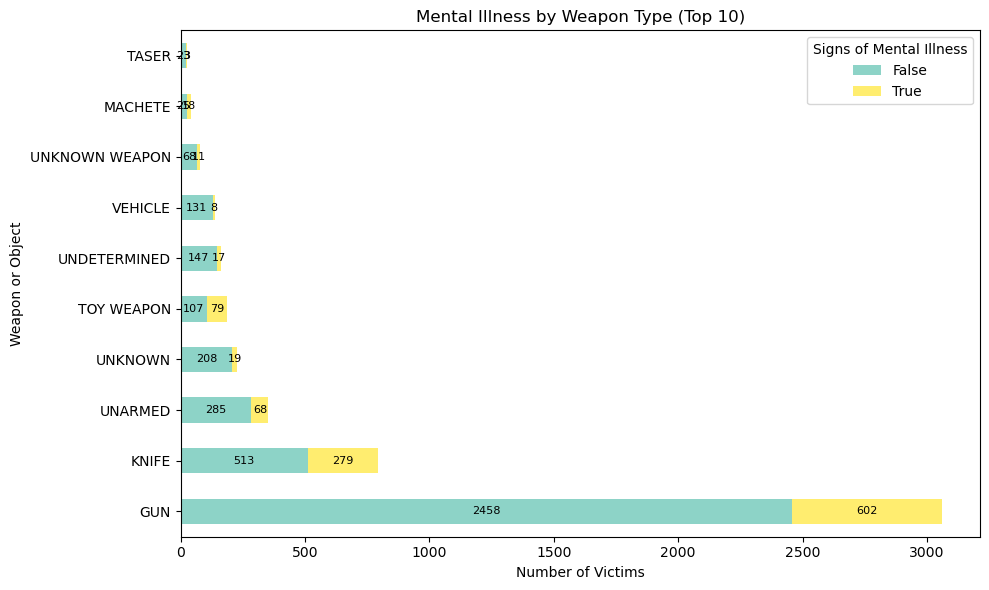

In [43]:
# Plot Top 10
ax = mental_armed_top.plot(
    kind='barh',
    stacked=True,
    figsize=(10, 6),
    colormap='Set3'
)

plt.title('Mental Illness by Weapon Type (Top 10)')
plt.xlabel('Number of Victims')
plt.ylabel('Weapon or Object')
plt.legend(title='Signs of Mental Illness')
plt.tight_layout()

# Add value labels
for i, weapon in enumerate(mental_armed_top.index):
    left = 0
    for sign in mental_armed_top.columns:
        value = mental_armed_top.loc[weapon, sign]
        if value > 0:
            ax.text(
                left + value / 2,
                i,
                str(int(value)),
                va='center',
                ha='center',
                fontsize=8
            )
            left += value

plt.show()


"GUN" is by far the most common weapon in police shootings.

Mental illness was present in:

A significant number of knife and unarmed cases

A noticeable portion of "UNKNOWN", "TOY WEAPON", and "UNDETERMINED" too

That yellow bar next to “UNARMED” means people with mental illness were still shot even when unarmed.

# Does threat level affect body camera use

In [44]:
df.columns.tolist()

['id',
 'name',
 'date',
 'manner_of_death',
 'armed',
 'age',
 'gender',
 'race',
 'city',
 'state',
 'signs_of_mental_illness',
 'threat_level',
 'flee',
 'body_camera',
 'year',
 'month',
 'weekday']

In [45]:
df["threat_level"].value_counts()

threat_level
ATTACK          3495
OTHER           1682
UNDETERMINED     239
Name: count, dtype: int64

In [46]:
df["flee"].value_counts()

flee
NOT FLEEING    3411
CAR             900
FOOT            692
UNKNOWN         249
OTHER           164
Name: count, dtype: int64

In [47]:
(df["flee"].value_counts(normalize=True).round(2))

flee
NOT FLEEING    0.63
CAR            0.17
FOOT           0.13
UNKNOWN        0.05
OTHER          0.03
Name: proportion, dtype: float64

In [48]:

threatby = df.groupby(["threat_level", "flee"]).size().unstack(fill_value=0)
threatby

flee,CAR,FOOT,NOT FLEEING,OTHER,UNKNOWN
threat_level,,,,,
ATTACK,588,450,2224,107,126
OTHER,277,203,1073,47,82
UNDETERMINED,35,39,114,10,41


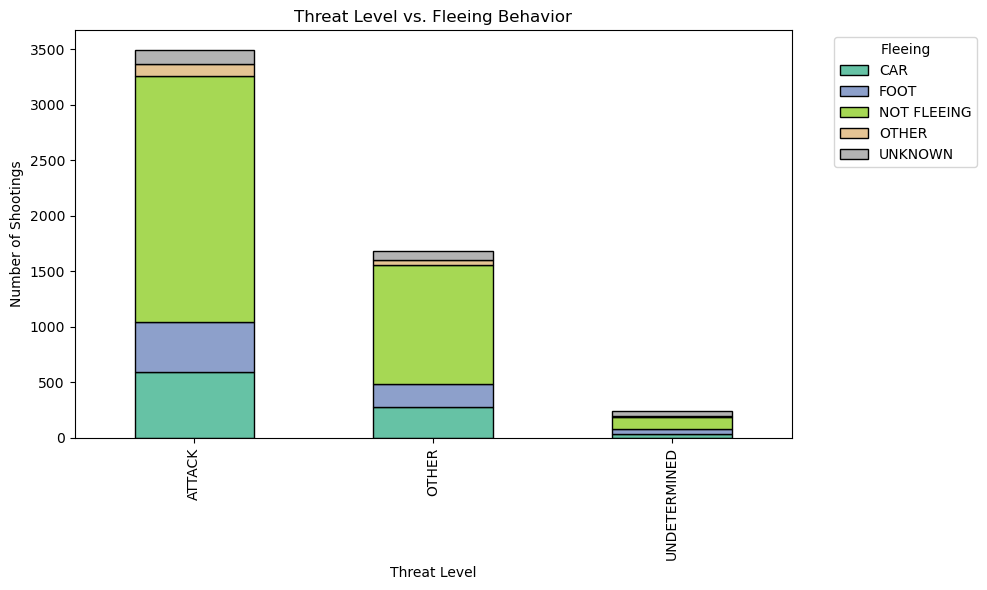

In [49]:
# Basic stacked bar plot (cleaner layout)
ax = threatby.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),        # Reasonable size
    colormap='Set2',
    edgecolor='black'
)

plt.title('Threat Level vs. Fleeing Behavior')
plt.xlabel('Threat Level')
plt.ylabel('Number of Shootings')
plt.legend(title='Fleeing', bbox_to_anchor=(1.05, 1), loc='upper left')  # Put legend outside
plt.tight_layout()
plt.show()


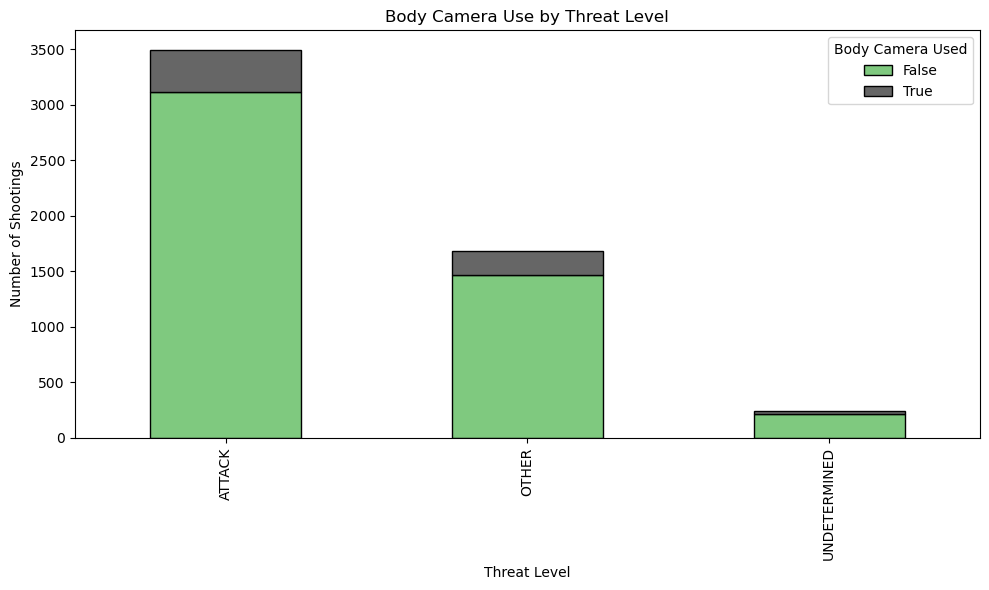

In [50]:
# Group by threat level and body camera usage
cam_threat = df.groupby(['threat_level', 'body_camera']).size().unstack(fill_value=0)

# Plot
cam_threat.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Accent', edgecolor='black')
plt.title('Body Camera Use by Threat Level')
plt.xlabel('Threat Level')
plt.ylabel('Number of Shootings')
plt.legend(title='Body Camera Used')
plt.tight_layout()

plt.show()


Most shootings (especially high-threat “attack” cases) occurred without body camera usage.

Even in “other” and “undetermined” threat levels, the number of shootings without cameras far outweighs those with.

This suggests a potential lack of accountability or inconsistent camera use, particularly in deadly encounters.

In [51]:
# Normalize the counts by row (i.e., by threat level)
cam_threat_pct = cam_threat.div(cam_threat.sum(axis=1), axis=0)


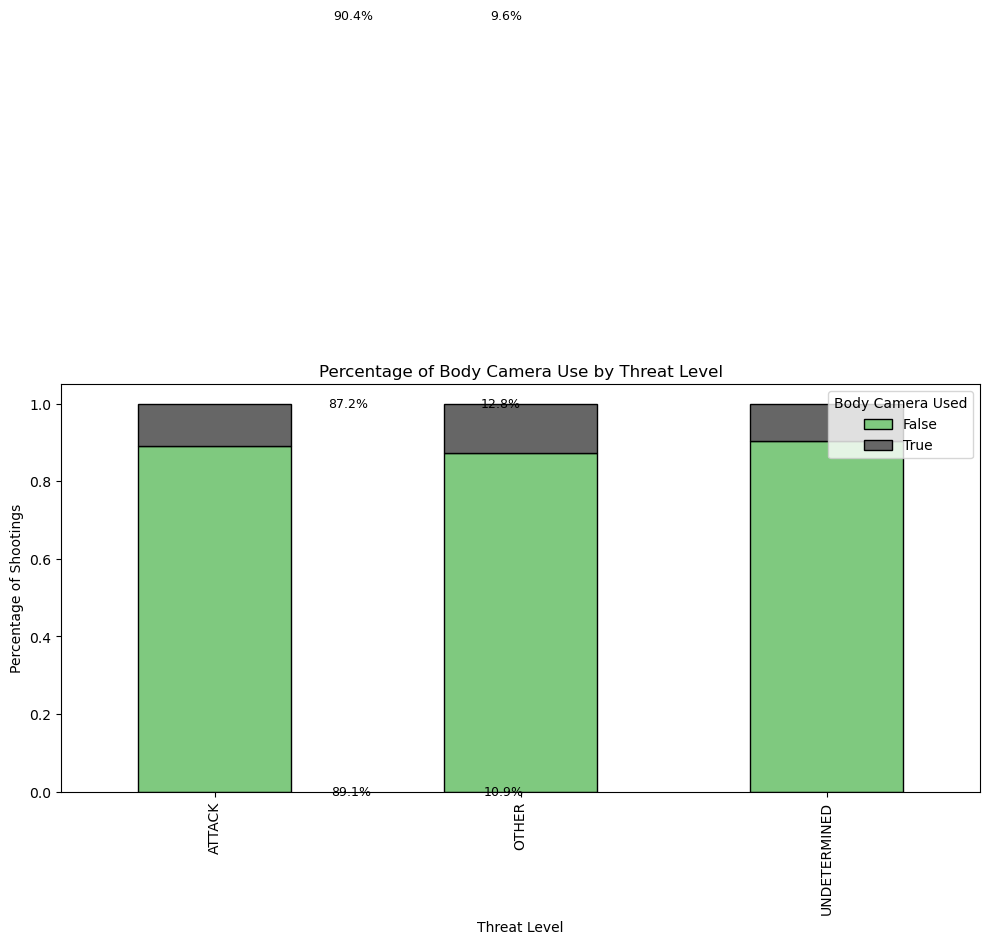

In [52]:
# Plot
ax = cam_threat_pct.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Accent', edgecolor='black')

plt.title('Percentage of Body Camera Use by Threat Level')
plt.xlabel('Threat Level')
plt.ylabel('Percentage of Shootings')
plt.legend(title='Body Camera Used', loc='upper right')
plt.tight_layout()

# Add labels
for i, index in enumerate(cam_threat_pct.index):
    left = 0
    for cam in cam_threat_pct.columns:
        value = cam_threat_pct.loc[index, cam]
        if value > 0:
            ax.text(
                left + value / 2,
                i,
                f'{value*100:.1f}%',
                ha='center',
                va='center',
                fontsize=9,
                color='black'
            )
            left += value

plt.show()


# Are fleeing individuals more likely to be shot unarmed?

In [53]:
flee_armed = df.groupby(['flee', 'armed']).size().unstack(fill_value=0)
flee_armed


armed,AIR CONDITIONER,AIR PISTOL,AIRSOFT PISTOL,AX,BARSTOOL,BASEBALL BAT,BASEBALL BAT AND BOTTLE,BASEBALL BAT AND FIREPLACE POKER,BASEBALL BAT AND KNIFE,BATON,...,UNARMED,UNDETERMINED,UNKNOWN,UNKNOWN WEAPON,VEHICLE,VEHICLE AND GUN,VEHICLE AND MACHETE,WALKING STICK,WASP SPRAY,WRENCH
flee,,,,,,,,,,,,,,,,,,,,,
CAR,0,0,0,0,0,0,0,0,0,0,...,67,36,155,7,102,1,0,0,0,0
FOOT,0,0,0,1,0,1,0,0,0,1,...,75,22,4,6,4,1,1,1,0,0
NOT FLEEING,1,1,1,18,1,17,1,1,1,4,...,191,72,53,50,30,2,0,0,1,1
OTHER,0,0,0,0,0,0,0,0,0,0,...,11,6,7,5,2,0,0,0,0,0
UNKNOWN,0,0,0,5,0,0,0,0,0,0,...,9,28,8,11,1,0,0,0,0,0


In [54]:
# Group by city and state
city_state_counts = (
    df.groupby(['state', 'city'])
    .size()
    .reset_index(name='shooting_count')
    .sort_values('shooting_count', ascending=False)
)

city_state_counts.head(10)


,state,city,shooting_count
375,CA,LOS ANGELES,85
184,AZ,PHOENIX,77
2385,TX,HOUSTON,56
1777,NV,LAS VEGAS,45
2458,TX,SAN ANTONIO,43
981,IL,CHICAGO,38
1734,NM,ALBUQUERQUE,35
1864,OH,COLUMBUS,31
556,CO,DENVER,30
1991,OK,OKLAHOMA CITY,30


In [68]:
# Group by city and state
city_state_counts = (
    df.groupby(['state', 'city'])
    .size()
    .reset_index(name='shooting_count')
    .sort_values('shooting_count', ascending=False)
)

city_state_counts.value_counts().size()


TypeError: 'int' object is not callable

In [60]:
top10_cities = city_state_counts.head(10).copy()

#Avoid copying actgual DF

# want to visualize it now 

In [61]:
# add lat and long 
city_coords = {
    ("CA", "LOS ANGELES"): (34.0522, -118.2437),
    ("AZ", "PHOENIX"): (33.4484, -112.0740),
    ("TX", "HOUSTON"): (29.7604, -95.3698),
    ("NV", "LAS VEGAS"): (36.1699, -115.1398),
    ("TX", "SAN ANTONIO"): (29.4241, -98.4936),
    ("IL", "CHICAGO"): (41.8781, -87.6298),
    ("NM", "ALBUQUERQUE"): (35.0844, -106.6504),
    ("OH", "COLUMBUS"): (39.9612, -82.9988),
    ("CO", "DENVER"): (39.7392, -104.9903),
    ("OK", "OKLAHOMA CITY"): (35.4676, -97.5164),
}


In [62]:
# Merge into the df 

# Create empty columns
top10_cities["latitude"] = None
top10_cities["longitude"] = None

# Fill them
for i, row in top10_cities.iterrows():
    coords = city_coords.get((row["state"], row["city"]))
    if coords:
        top10_cities.at[i, "latitude"] = coords[0]
        top10_cities.at[i, "longitude"] = coords[1]

top10_cities


,state,city,shooting_count,latitude,longitude
375,CA,LOS ANGELES,85,34.0522,-118.2437
184,AZ,PHOENIX,77,33.4484,-112.074
2385,TX,HOUSTON,56,29.7604,-95.3698
1777,NV,LAS VEGAS,45,36.1699,-115.1398
2458,TX,SAN ANTONIO,43,29.4241,-98.4936
981,IL,CHICAGO,38,41.8781,-87.6298
1734,NM,ALBUQUERQUE,35,35.0844,-106.6504
1864,OH,COLUMBUS,31,39.9612,-82.9988
556,CO,DENVER,30,39.7392,-104.9903
1991,OK,OKLAHOMA CITY,30,35.4676,-97.5164


In [64]:


# Create base map centered over the continental US
m = folium.Map(location=[39, -98], zoom_start=4)


In [65]:
# Loop through each row and add a marker
for _, row in top10_cities.iterrows():
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=5 + row["shooting_count"]/10,  # Make radius proportional to shootings
        color="crimson",
        fill=True,
        fill_opacity=0.7,
        popup=folium.Popup(
            f"<b>{row['city'].title()}, {row['state']}</b><br>Shootings: {row['shooting_count']}",
            max_width=250
        )
    ).add_to(m)


In [66]:
m

In [69]:
m.save("top10_police_shootings_map.html")


In [77]:

print(f'How many people have repoerted their ages: {df.age.count()}')

How many people have repoerted their ages: 5181


In [72]:
df.shape

(5416, 17)

In [73]:
5416-5181

235

In [78]:
df.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'year', 'month', 'weekday'],
      dtype='object')

In [79]:
print(f'Uniqge for age: {df.age.nunique()}')

Uniqge for age: 77


In [80]:
print(f'Uniqge for race: {df.race.nunique()}')

Uniqge for race: 7


In [82]:
print(f'race type: {df.race.dtype}')

race type: object


In [55]:
!pip install geopy


In [56]:
#from geopy.geocoders import Nominatim #  is a geocoder (part of the OpenStreetMap project) that can turn "City, State, USA" into lat/lon.
#import time # when it runs/ loops lets us pause between requests to avoid getting blocked.

#geolocator = Nominatim(user_agent="shootings_mapper") # you can pick any name You must give it a user_agent string. It’s like an ID telling the server who you are.

#city_state_counts["latitude"] = None # makes new column stores in " none " for now
#city_state_counts["longitude"] = None

#for i, row in city_state_counts.iterrows(): #gives u the row number, row gives u the Series with all the data from that row.
 #   location_name = f"{row['city']}, {row['state']}, USA" #  Create a string for the place to look up. into geocoder
  #  try:
   #     location = geolocator.geocode(location_name, timeout=10)
    #    if location:
        #    city_state_counts.at[i, "latitude"] = location.latitude
         #   city_state_counts.at[i, "longitude"] = location.longitude
       # else:
           # print(f"Location not found: {location_name}")
   # except Exception as e:
        #print(f"Error geocoding {location_name}: {e}")

    # Sleep longer between requests
    #time.sleep(2)
